## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

### Avaliação 2

#### Entrega até 1/12/2025, individual.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 70% das observações e
teste com 30%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#df = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Datasets/refs/heads/main/sneeze0.csv')
df = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Datasets/refs/heads/main/sneeze3.csv')


In [3]:
df = df.iloc[:, 1:]

df

,nsneeze,alcohol,antihist,smoker,age,pollen
0,15,0,0,0,50.0,38.988883
1,12,1,0,0,46.0,75.139146
2,14,0,0,0,30.0,51.610290
3,45,0,0,1,18.0,73.879321
4,18,0,0,1,43.0,33.169897
...,...,...,...,...,...,...
1495,7,0,1,0,36.0,44.390893
1496,63,1,0,0,34.0,67.670916
1497,26,0,0,0,41.0,42.813928
1498,7,0,0,0,31.0,30.712867


In [4]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')

## Análise exploratória

Objetivo: avaliar associação entre a variável **nsneeze** e as demais


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


In [5]:
df.nsneeze.value_counts()

nsneeze
10     61
6      57
8      54
7      51
11     50
       ..
466     1
209     1
87      1
144     1
82      1
Name: count, Length: 180, dtype: int64

### Avaliando nsneeze e alcóol

In [25]:
df.groupby(['alcohol']).agg({'nsneeze': 'sum'}).reset_index()

,alcohol,nsneeze
0,0,34135
1,1,31549


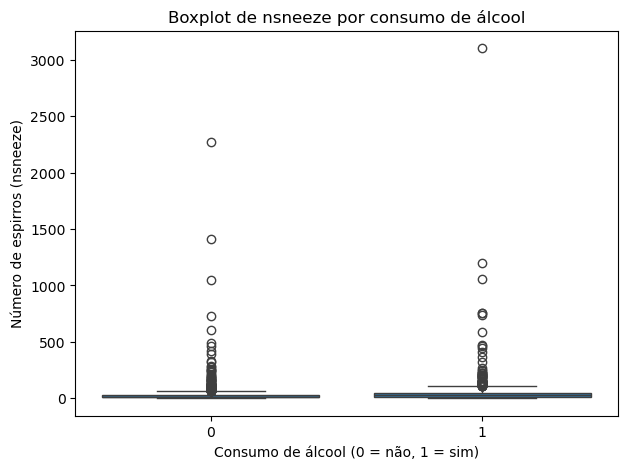

In [ ]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="alcohol", y="nsneeze")

plt.xlabel("Consumo de álcool (0 = não, 1 = sim)")
plt.ylabel("Número de espirros (nsneeze)")
plt.title("Boxplot de nsneeze por consumo de álcool")

#plt.ylim(0, 100)   # coloque aqui o intervalo desejado

plt.show()

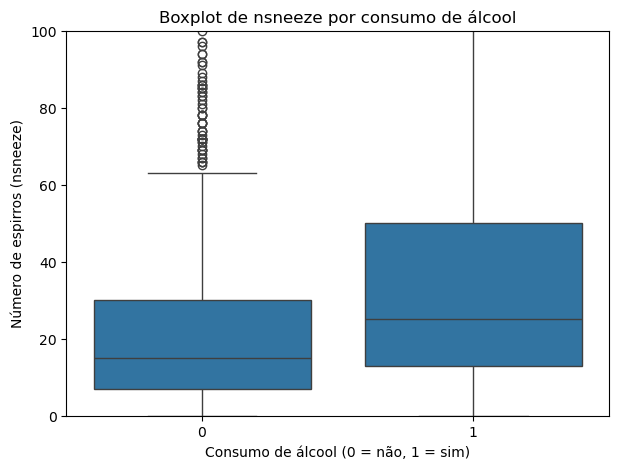

In [30]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="alcohol", y="nsneeze")

plt.xlabel("Consumo de álcool (0 = não, 1 = sim)")
plt.ylabel("Número de espirros (nsneeze)")
plt.title("Boxplot de nsneeze por consumo de álcool")

plt.ylim(0, 100)   # coloque aqui o intervalo desejado

plt.show()

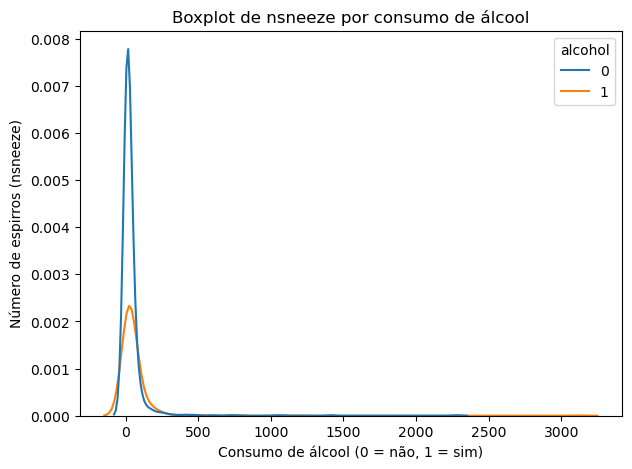

In [39]:
plt.figure(figsize=(7, 5))
sns.kdeplot(x= df['nsneeze'] , hue = df['alcohol'])

plt.xlabel("Consumo de álcool (0 = não, 1 = sim)")
plt.ylabel("Número de espirros (nsneeze)")
plt.title("Boxplot de nsneeze por consumo de álcool")

#plt.ylim(0, 100)   # coloque aqui o intervalo desejado

plt.show()

### Analisando antihist

In [ ]:
df.groupby(['antihist']).agg({'nsneeze': 'sum'}).reset_index()

,antihist,nsneeze
0,0,56499
1,1,9185


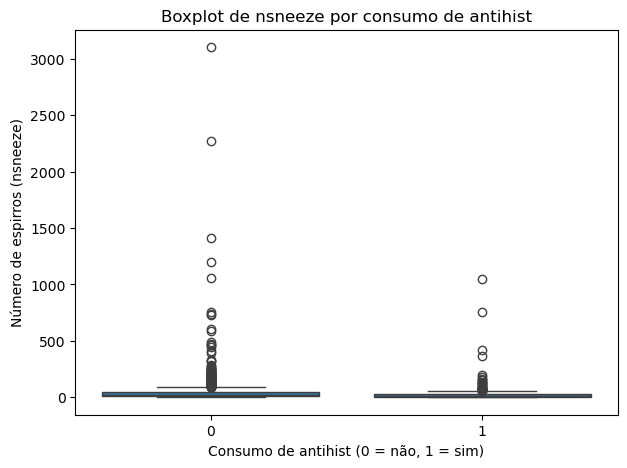

In [27]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="antihist", y="nsneeze")

plt.xlabel("Consumo de antihist (0 = não, 1 = sim)")
plt.ylabel("Número de espirros (nsneeze)")
plt.title("Boxplot de nsneeze por consumo de antihist")

#plt.ylim(0, 100)   # coloque aqui o intervalo desejado

plt.show()

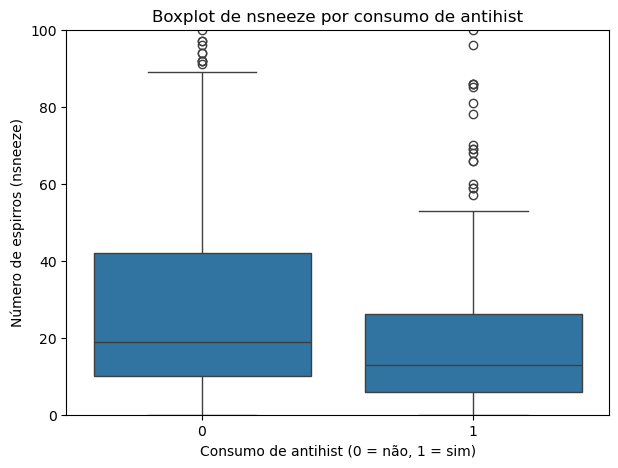

In [29]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="antihist", y="nsneeze")

plt.xlabel("Consumo de antihist (0 = não, 1 = sim)")
plt.ylabel("Número de espirros (nsneeze)")
plt.title("Boxplot de nsneeze por consumo de antihist")

plt.ylim(0, 100)   # coloque aqui o intervalo desejado

plt.show()

### Analisando o smoker

In [28]:
df.groupby(['smoker']).agg({'nsneeze': 'sum'}).reset_index()

,smoker,nsneeze
0,0,48766
1,1,16918


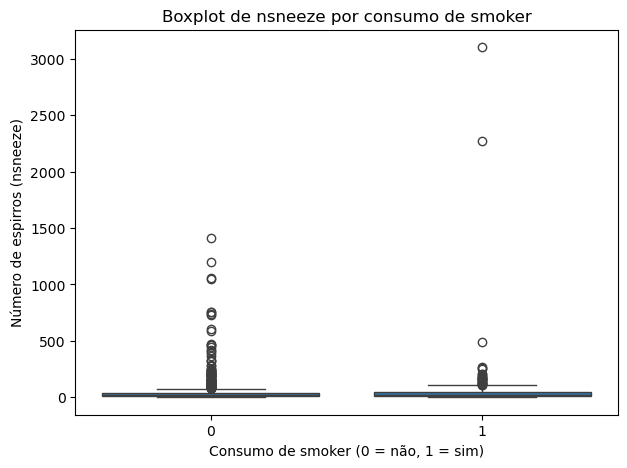

In [31]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="smoker", y="nsneeze")

plt.xlabel("Consumo de smoker (0 = não, 1 = sim)")
plt.ylabel("Número de espirros (nsneeze)")
plt.title("Boxplot de nsneeze por consumo de smoker")

#plt.ylim(0, 100)   # coloque aqui o intervalo desejado

plt.show()

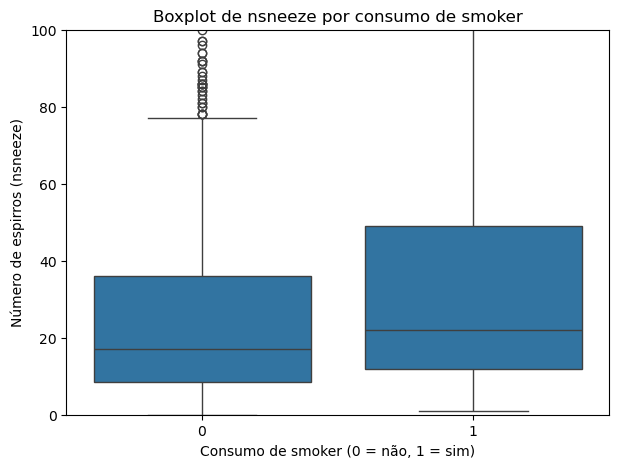

In [32]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="smoker", y="nsneeze")

plt.xlabel("Consumo de smoker (0 = não, 1 = sim)")
plt.ylabel("Número de espirros (nsneeze)")
plt.title("Boxplot de nsneeze por consumo de smoker")

plt.ylim(0, 100)   # coloque aqui o intervalo desejado

plt.show()

### Analisando age

In [41]:
df.groupby(['age']).agg({'nsneeze': 'sum'}).reset_index().sort_values('nsneeze', ascending = False)

,age,nsneeze
0,18.0,11671
12,30.0,3361
15,33.0,2827
3,21.0,2678
27,45.0,2628
17,35.0,2272
7,25.0,2258
25,43.0,2230
24,42.0,2133
20,38.0,1926


<Axes: xlabel='age', ylabel='nsneeze'>

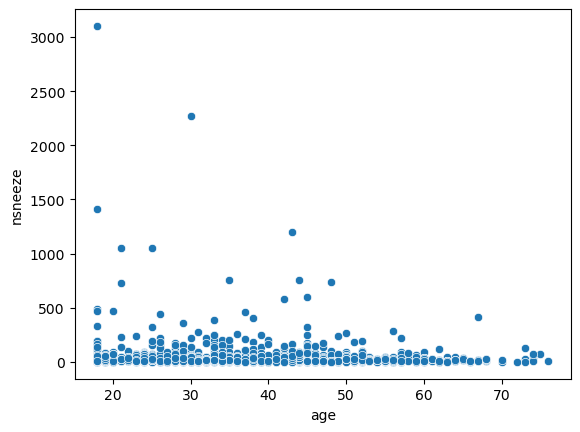

In [36]:
sns.scatterplot(x=df["age"], y=df["nsneeze"])

### Analisando polen

In [ ]:
sns.scatterplot(x=df["age"], y=df["nsneeze"])

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [107]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

In [108]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [109]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)

ajuste_pois = modelo_pois.fit()
print(ajuste_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                  800
Model:                            GLM   Df Residuals:                      794
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2413.3
Date:                Mon, 24 Nov 2025   Deviance:                       1737.0
Time:                        21:27:33   Pearson chi2:                 1.71e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9967
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.6008      0.040  


**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


In [110]:
def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, 'o', label="Resíduos observados")
    plt.plot(lower, 'r--', linewidth=1, label="banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

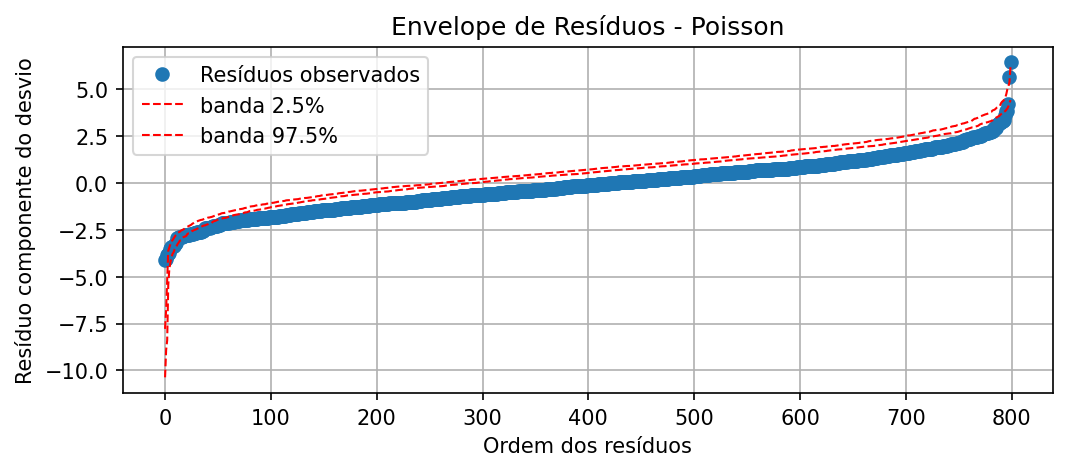

In [111]:
results = ajuste_pois
X = preditoras
plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(results, X, "Envelope de Resíduos - Poisson")

**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [112]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

alpha_fixado = 0.2

#alpha para sneeze1 a sneeze5 = 0.23, 0.3, 0.25,  0.2, 0.2

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()
print(ajuste_nb.summary())

alpha_usado = ajuste_nb.family.alpha
print("Alpha usado no modelo:", alpha_usado)

alpha_est = ajuste_nb.params.iloc[-1]
print("Alpha estimado:", alpha_est)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                  800
Model:                            GLM   Df Residuals:                      794
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2270.3
Date:                Mon, 24 Nov 2025   Deviance:                       635.30
Time:                        21:27:35   Pearson chi2:                     576.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.7730
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5700      0.073  



**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [113]:
def envelope_negbin(fitted_model, title):
    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)


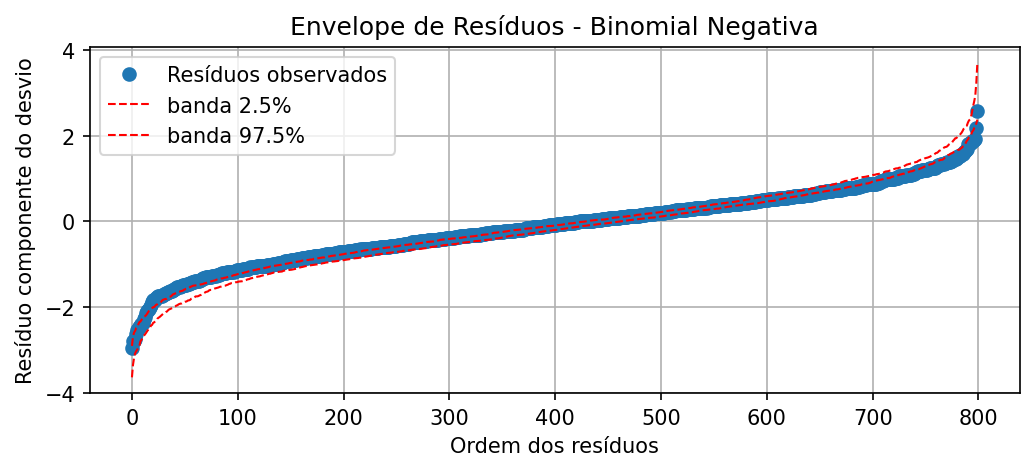

In [114]:
results_nb = ajuste_nb

plt.figure(figsize=(8, 3), dpi=150)
envelope_negbin(results_nb, "Envelope de Resíduos - Binomial Negativa")

**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.